# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    return x**2*numpy.sin(x)


Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    return 2*x*numpy.sin(x)-(x**2-2)*numpy.cos(x) -2


Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax) - g(xmin)

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    h = (xmax - xmin)/N
    x = xmin
    k = 0.0
    for i in range(int(N)):
        xmid = x + (h/2)
        xend = x + h
        k += f(x) + 4*f(xmid) + f(xend)
        x = xend
    return (h*k)/6
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''

Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


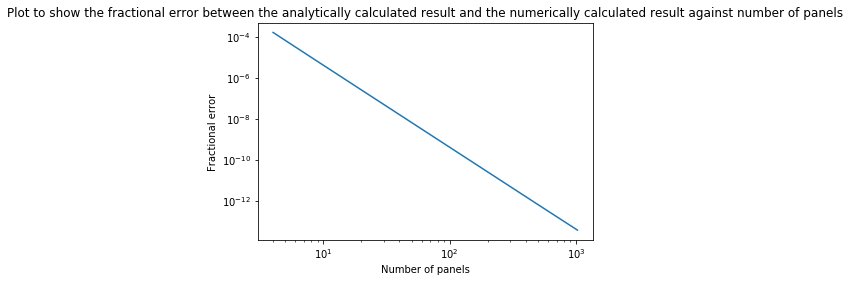

In [15]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

n4 = result_analytic-integrate_numeric(x0, x1, 4)
n8 = result_analytic-integrate_numeric(x0, x1, 8)
n16 = result_analytic-integrate_numeric(x0, x1, 16)
n32 = result_analytic-integrate_numeric(x0, x1, 32)
n64 = result_analytic-integrate_numeric(x0, x1, 64)
n128 = result_analytic-integrate_numeric(x0, x1, 128)
n256 = result_analytic-integrate_numeric(x0, x1, 256)
n512 = result_analytic-integrate_numeric(x0, x1, 512)
n1024 = result_analytic-integrate_numeric(x0, x1, 1024)


y = numpy.array([n4,n8,n16,n32,n64,n128,n256,n512,n1024])
y = numpy.divide(y,result_analytic) #fractional error
x = numpy.array([4,8,16,32,64,128,256,512,1024]) #no. of panels

plt.plot(x,y)
plt.yscale('log')
plt.xscale('log')

plt.ylabel("Fractional error")
plt.xlabel("Number of panels")

plt.title("Plot to show the fractional error between the analytically calculated result, and the numerically calculated result against number of panels")

plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The greater the number of panels the more accurate the numerical method becomes. As the number of panels increase, the narrower the width of each panel becomes, making it closer to an actual integral, whoever, in practice, this doesn't quite work as the fractional error does not consistently decrease, as once reach too large number of panels it begins to fluctuate due to rounding errors. Simpson's rule can be used for all functions, however is most useful/accurate for sufficiently non-diverging, higher-ordered, smooth functions whose derivatives are also smooth.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Increasing panel count still increases accuracy for the trapezium rule, albeit at a lesser rate than for Simpson's rule, if plotted alongside the Simpsons rule results in the above figure, it would also show a constant, negative trend but with a shallower gradient. Less susceptible to rounding errors due to fewer number of calculations required. The error in the trapezium rule is less affected if function is not as smooth/highly-ordered/non-diverging than Simpson's rule, although it still generally has a higher fractional error.